In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa import x13
import datetime


# define paths

path = r'C:\Users\PRADMIN\Desktop\pnadc\pnadc.csv'
xpath = r'C:\Users\PRADMIN\Desktop\pnadc\WinX13\x13as\x13as.exe'

In [2]:
# import dataframe

df = pd.read_csv(path, decimal=',', sep=";").dropna()

# set date index

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [3]:
# adjust scale

df.tx_d = df.tx_d * 100

In [4]:
# seasonally adjust

results = x13.x13_arima_analysis(df['tx_d'], x12path=xpath, freq='M')
df['tx_d_sa'] = results.seasadj

In [5]:
# seasonally adjusted vs. nonseasonally adjusted series

df[['tx_d','tx_d_sa']]

,tx_d,tx_d_sa
date,,
2012-03-31,7.949270,7.418147
2012-04-30,7.756535,7.304824
2012-05-31,7.614465,7.339016
2012-06-30,7.524472,7.343916
2012-07-31,7.439963,7.292591
2012-08-31,7.295535,7.241193
2012-09-30,7.072562,7.159604
2012-10-31,6.896445,7.175635
2012-11-30,6.771683,7.222713


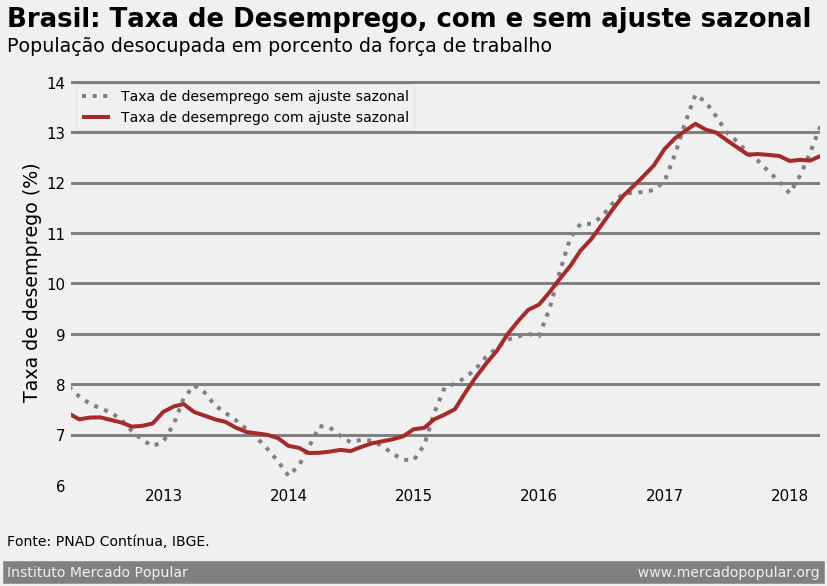

In [6]:
################### CHARTS

# USER SETTINGS

LEFT = df.index.min()
RIGHT = df.index.max()
BOTTOM = 6
TOP = 14.1

TITLE = "Brasil: Taxa de Desemprego, com e sem ajuste sazonal"
SUBTITLE = "População desocupada em porcento da força de trabalho"

Y_LABEL = "Taxa de desemprego (%)"

SOURCE = 'PNAD Contínua, IBGE.'

# CODE

plt.style.use('fivethirtyeight')

# Declare figure
fig, ax = plt.subplots(figsize=(12,7))

# Plot line
plt.plot(df.index, df.tx_d, color='grey', linestyle=":",
         label = "Taxa de desemprego sem ajuste sazonal")
plt.plot(df.index, df.tx_d_sa, color='brown', 
         label = "Taxa de desemprego com ajuste sazonal")

# Configure axes
ax.yaxis.grid(which="major", color='grey', linewidth=3)
ax.xaxis.grid(which="major", linewidth=0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlim(left = LEFT, right = RIGHT)
ax.set_ylim(bottom = BOTTOM, top = TOP)

# Set legend
plt.legend(loc='upper left')

# Set titles
ax.text(x = LEFT- datetime.timedelta(hours=24 * 180), y = TOP+1, s = TITLE,
               fontsize = 26, weight = 'bold')
ax.text(x = LEFT- datetime.timedelta(hours=24 * 180), y = TOP+0.5, 
               s = SUBTITLE,
              fontsize = 19)

# Set axis labels
ax.set_ylabel(Y_LABEL, fontsize=19)

# Set source:

ax.text(x =  LEFT - datetime.timedelta(hours=24 * 180), y = BOTTOM-1.2,
    s = 'Fonte: ' + SOURCE,
    fontsize = 14)

# Set label below
ax.text(x = LEFT - datetime.timedelta(hours=24 * 180), y = BOTTOM-1.8,
    s = 'Instituto Mercado Popular' + ' '*100 + 'www.mercadopopular.org',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
plt.show()